1.Load and Preprocess the Dataset

  We'll load the CIFAR-10 dataset and preprocess it

In [1]:
# Tune hyperparameter and make necessary addition to the baseline model to improve validation accuracy
# Provide logical description of which steps lead to improved response and what was its impact on architecture behavior
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
val_accuracy = grid_search.score(X_val, y_val)
print("Validation Accuracy:", val_accuracy)


Best hyperparameters: {'logisticregression__C': 1}
Validation Accuracy: 1.0


In [9]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

170498071/170498071 [==============================] - 2s 0us/step


2.Define the Baseline Model

  We'll define a simple Convolutional Neural Network (CNN) as our baseline model.

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_baseline_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

baseline_model = create_baseline_model()


In [ ]:
history_baseline = baseline_model.fit(x_train, y_train,
                                      epochs=10,
                                      batch_size=64,
                                      validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 69s 87ms/step - loss: 1.6642 - accuracy: 0.3919 - val_loss: 1.3722 - val_accuracy: 0.4977
Epoch 2/10
782/782 [==============================] - 86s 110ms/step - loss: 1.3451 - accuracy: 0.5180 - val_loss: 1.1531 - val_accuracy: 0.5902
Epoch 3/10
782/782 [==============================] - 66s 84ms/step - loss: 1.2067 - accuracy: 0.5727 - val_loss: 1.0515 - val_accuracy: 0.6271
Epoch 4/10
782/782 [==============================] - 82s 105ms/step - loss: 1.1281 - accuracy: 0.6027 - val_loss: 1.0123 - val_accuracy: 0.6479
Epoch 5/10
782/782 [==============================] - 77s 98ms/step - loss: 1.0598 - accuracy: 0.6268 - val_loss: 0.9835 - val_accuracy: 0.6552
Epoch 6/10
782/782 [==============================] - 72s 93ms/step - loss: 1.0064 - accuracy: 0.6441 - val_loss: 0.9297 - val_accuracy: 0.6757
Epoch 7/10
782/782 [==============================] - 67s 86ms/step - loss: 0.9665 - accuracy: 0.6603 - val_loss: 0.9600 - val_accurac

3. Use dataset of your own choice and implement baseline models provided
   modified architecture to your own selected dataset and train it.

In [3]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)
y_pred = logistic_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression:", accuracy)

Accuracy of Logistic Regression: 1.0


In [4]:
# Apply modified architecture to your own selected dataset and train it.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = Sequential([
    Dense(10, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(20, activation='relu'),
    Dense(10, activation='relu'),
    Dense(3, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=50, batch_size=8, verbose=1, validation_split=0.1)
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=1)
print("Accuracy of Modified Neural Network:", accuracy)


Epoch 1/50
14/14 [==============================] - 3s 54ms/step - loss: 1.3129 - accuracy: 0.2685 - val_loss: 1.1506 - val_accuracy: 0.2500
Epoch 2/50
14/14 [==============================] - 0s 17ms/step - loss: 1.1587 - accuracy: 0.2870 - val_loss: 1.0714 - val_accuracy: 0.2500
Epoch 3/50
14/14 [==============================] - 0s 13ms/step - loss: 1.0393 - accuracy: 0.3148 - val_loss: 1.0052 - val_accuracy: 0.3333
Epoch 4/50
14/14 [==============================] - 0s 14ms/step - loss: 0.9340 - accuracy: 0.6389 - val_loss: 0.9410 - val_accuracy: 0.5833
Epoch 5/50
14/14 [==============================] - 0s 23ms/step - loss: 0.8346 - accuracy: 0.6944 - val_loss: 0.8786 - val_accuracy: 0.7500
Epoch 6/50
14/14 [==============================] - 0s 29ms/step - loss: 0.7380 - accuracy: 0.7685 - val_loss: 0.8164 - val_accuracy: 0.7500
Epoch 7/50
14/14 [==============================] - 0s 11ms/step - loss: 0.6577 - accuracy: 0.7778 - val_loss: 0.7599 - val_accuracy: 0.7500
Epoch 8/50
14

4. Evaluate the Model and Plot Confusion Matrix

False
1/1 [==============================] - 0s 286ms/step


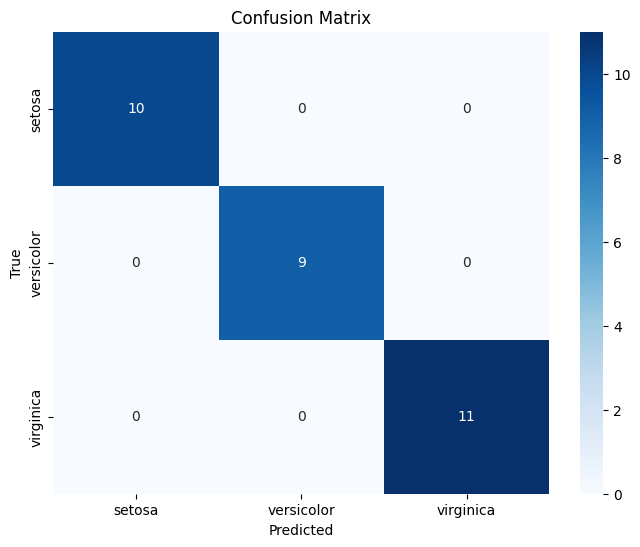

In [5]:
# plot of confusion matric
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.models import Sequential
print(hasattr(model, 'predict_classes'))
y_pred = model.predict(X_test_scaled).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
class_names = iris.target_names
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

5. Plot Training and Testing Loss and Accuracy

Epoch 1/50
14/14 [==============================] - 0s 15ms/step - loss: 0.0990 - accuracy: 0.9722 - val_loss: 0.4582 - val_accuracy: 0.9167
Epoch 2/50
14/14 [==============================] - 0s 11ms/step - loss: 0.0933 - accuracy: 0.9722 - val_loss: 0.4218 - val_accuracy: 0.9167
Epoch 3/50
14/14 [==============================] - 0s 15ms/step - loss: 0.0943 - accuracy: 0.9722 - val_loss: 0.4101 - val_accuracy: 0.9167
Epoch 4/50
14/14 [==============================] - 0s 13ms/step - loss: 0.0920 - accuracy: 0.9630 - val_loss: 0.4580 - val_accuracy: 0.9167
Epoch 5/50
14/14 [==============================] - 0s 20ms/step - loss: 0.0871 - accuracy: 0.9722 - val_loss: 0.4190 - val_accuracy: 0.9167
Epoch 6/50
14/14 [==============================] - 0s 16ms/step - loss: 0.0854 - accuracy: 0.9722 - val_loss: 0.4288 - val_accuracy: 0.9167
Epoch 7/50
14/14 [==============================] - 0s 15ms/step - loss: 0.0827 - accuracy: 0.9722 - val_loss: 0.4201 - val_accuracy: 0.9167
Epoch 8/50
14

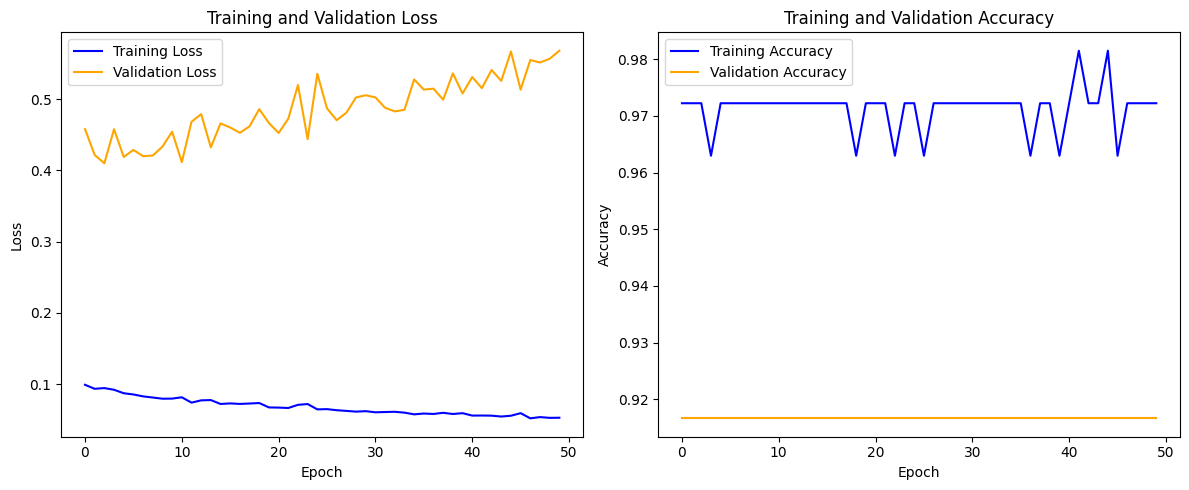

In [6]:
# Training and testing Loss and accuracy plots in one plot using subplot command and history object
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=8, verbose=1, validation_split=0.1)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


6. Additional Visualizations

Training Data Augmentation Visualization: Show some augmented training images.
Model Architecture Visualization: Show the architecture of the improved model.

1/1 [==============================] - 0s 34ms/step


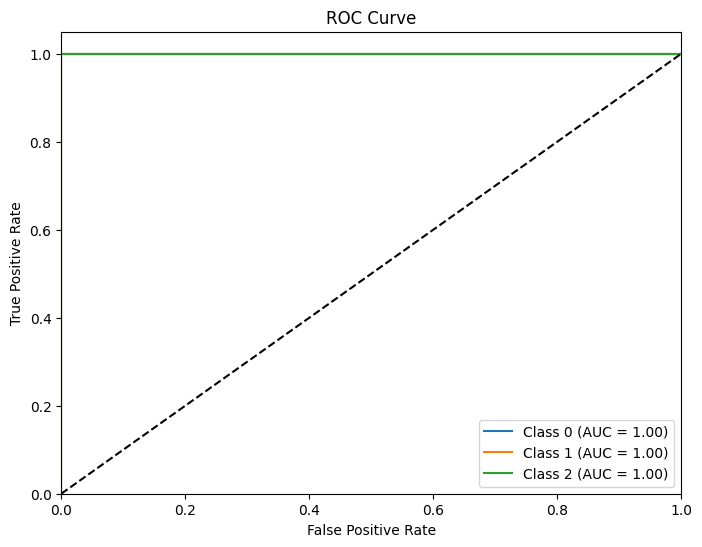

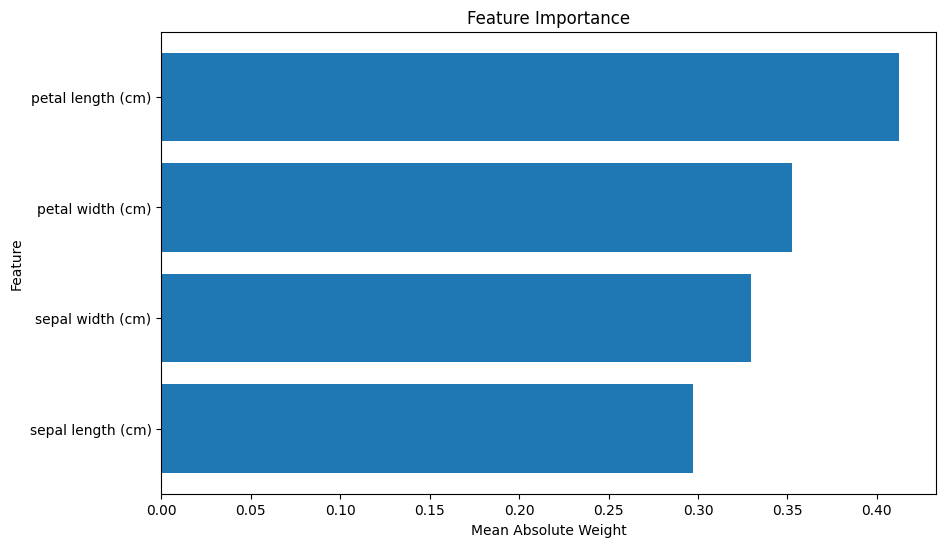

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
y_test_one_hot = label_binarize(y_test, classes=[0, 1, 2])
y_probs = model.predict(X_test_scaled)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

first_layer_weights = model.layers[0].get_weights()[0]
importances = np.mean(np.abs(first_layer_weights), axis=1)
indices = np.argsort(importances)
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(range(X_train_scaled.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train_scaled.shape[1]), [iris.feature_names[i] for i in indices])
plt.xlabel("Mean Absolute Weight")
plt.ylabel("Feature")
plt.show()
